In [8]:
# For data management
import pandas as pd
import numpy as np


# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import classifiers
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Y\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Y\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Y\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df = pd.read_csv('DATA/music_data.csv')

In [10]:
selected_features = ['lyrics']

# Set X to be the features we are going to use.
X = df[selected_features].values
y = df['genre'].values

In [13]:
def make_lower(a_string):
    return a_string.lower()

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string

def stem_words(a_string):
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word)
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 

def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)    
    return input_string

df['message_clean'] = df['lyrics']

df['message_clean'] = df['lyrics'].apply(text_pipeline)

In [14]:
X = df['message_clean'].values

y = df['genre'].values

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# This makes your vocab matrix
vectorizer.fit(X)

# This transforms your documents into vectors.
X = vectorizer.transform(X)

print(X.shape, type(X))

(28372, 51693) <class 'scipy.sparse.csr.csr_matrix'>


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=42)

In [17]:
# Initalize our model.
model = MultinomialNB(alpha=.05)


# Fit our model with our training data.
model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

# Evaluate our model
accuracy =  model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.375154


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

       blues       0.32      0.15      0.21       926
     country       0.44      0.60      0.51      1123
     hip hop       0.37      0.39      0.38       198
        jazz       0.42      0.18      0.26       731
         pop       0.33      0.57      0.42      1398
      reggae       0.57      0.31      0.40       515
        rock       0.30      0.19      0.23       784

    accuracy                           0.38      5675
   macro avg       0.39      0.34      0.34      5675
weighted avg       0.38      0.38      0.35      5675



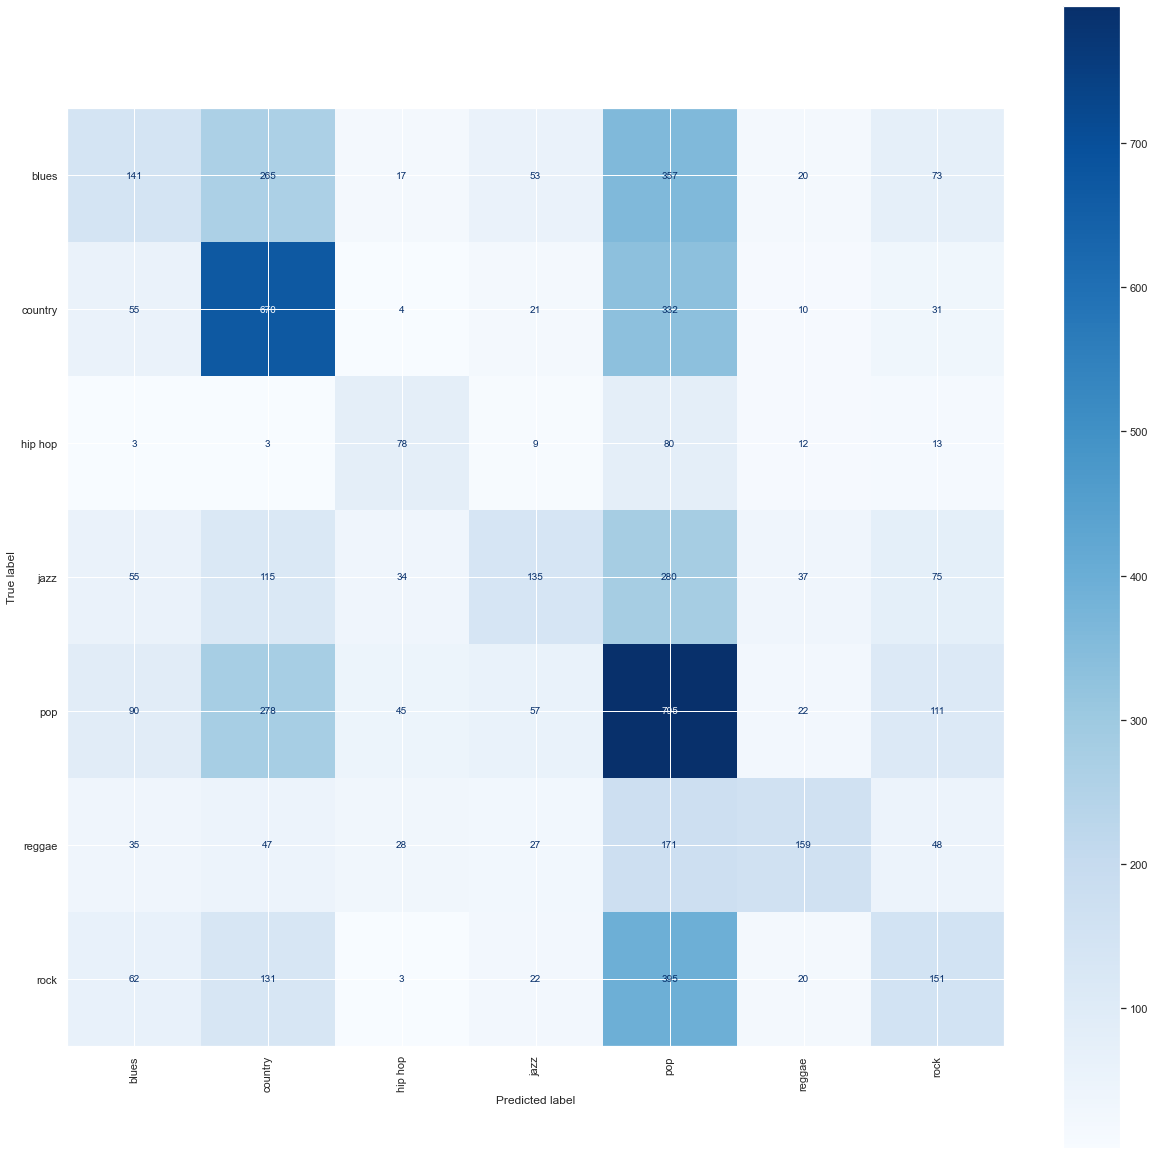

In [19]:
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [21]:
import pickle

filename = 'compare.pkl'

# EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME
pickle.dump(vectorizer, open('models/compare.pkl', 'wb'))